# Working with Matplotlib

In this notebook we illustrate the main concepts of matplotlib, how to create simple figures and how to make them more stylish. 

We start by importing the libraries. Note that we abbreviate the library `pyplot` as `plt` and `matplotlib` as `mpl`. In addition to matplotlib, we also import numpy and pandas. 

In [189]:

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd

There are two modes to work with Matplotlib. The first one let's us create plots with a minimum of effort, but it is very inflexible and should be avoided for larger plots. 

We show how the simple mode works by plotting a few common functions:

In [191]:
xs = np.linspace(-3, 3, 100) # 100 linearly spaced nubmer in [-3,3]
f1 = np.sin(xs)
f2 = np.power(xs, 2)
f3 = xs * 1.5

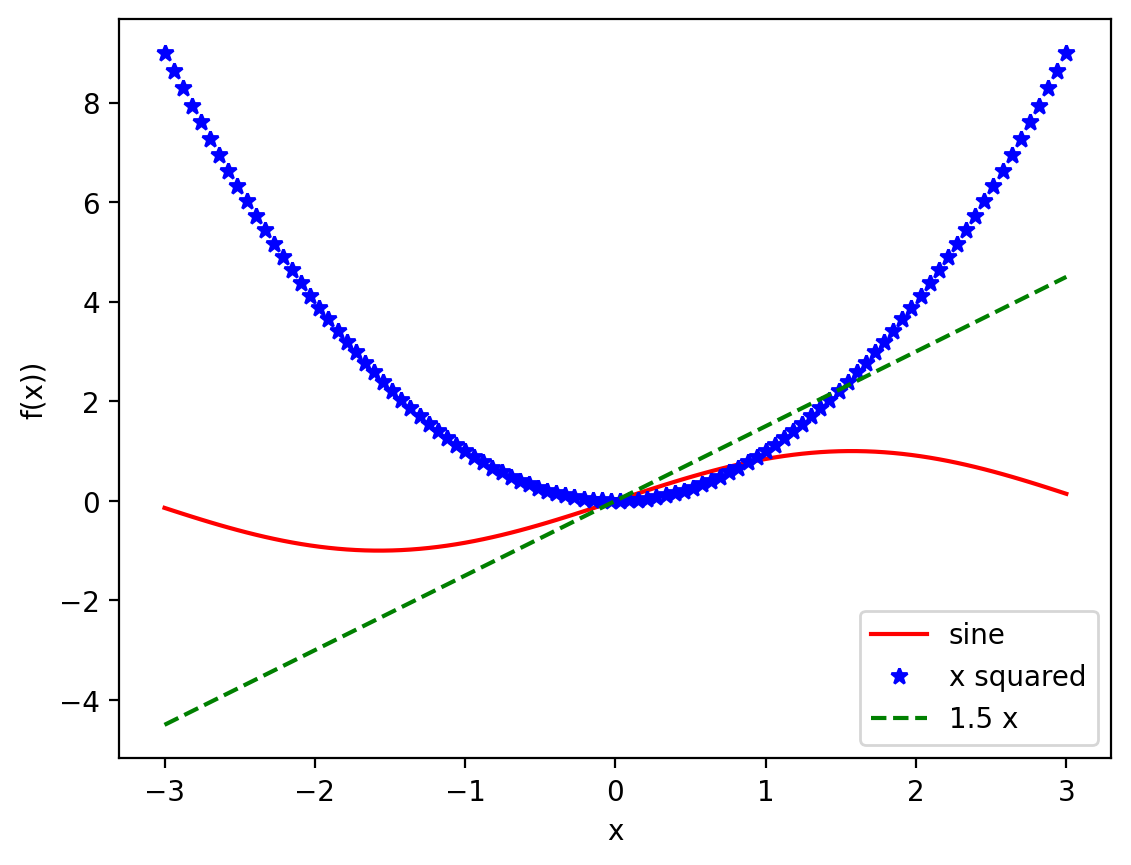

In [201]:
plt.plot(xs, f1, 'r-',  label='sine')
plt.plot(xs, f2, 'b*', label='x squared')
plt.plot(xs, f3, 'g--', label = '1.5 x')
plt.xlabel("x")
plt.ylabel("f(x))")
plt.legend()

You should easily be able to figure out, what the individual parts of the command do and how they affect the plot. 

Note that many things happen *automagically*. When we execute several plot commands in the same cell, the plots are all drawn in the same figure. When we call `xlabel` or `legend` which graphics this refers to is not specified but managed internally by matplotlib. Such implicit state leads to unreadable code and problems when we work with more than one figure. Therefore matplotlib has a second interface which makes everything more explicit. It is the recommended interface to use. 

To start a plot we create a figure using `plt.subplots`. This creates a new figure and returns both the figures and an axis object, which we can then use to manipulate the figure. 

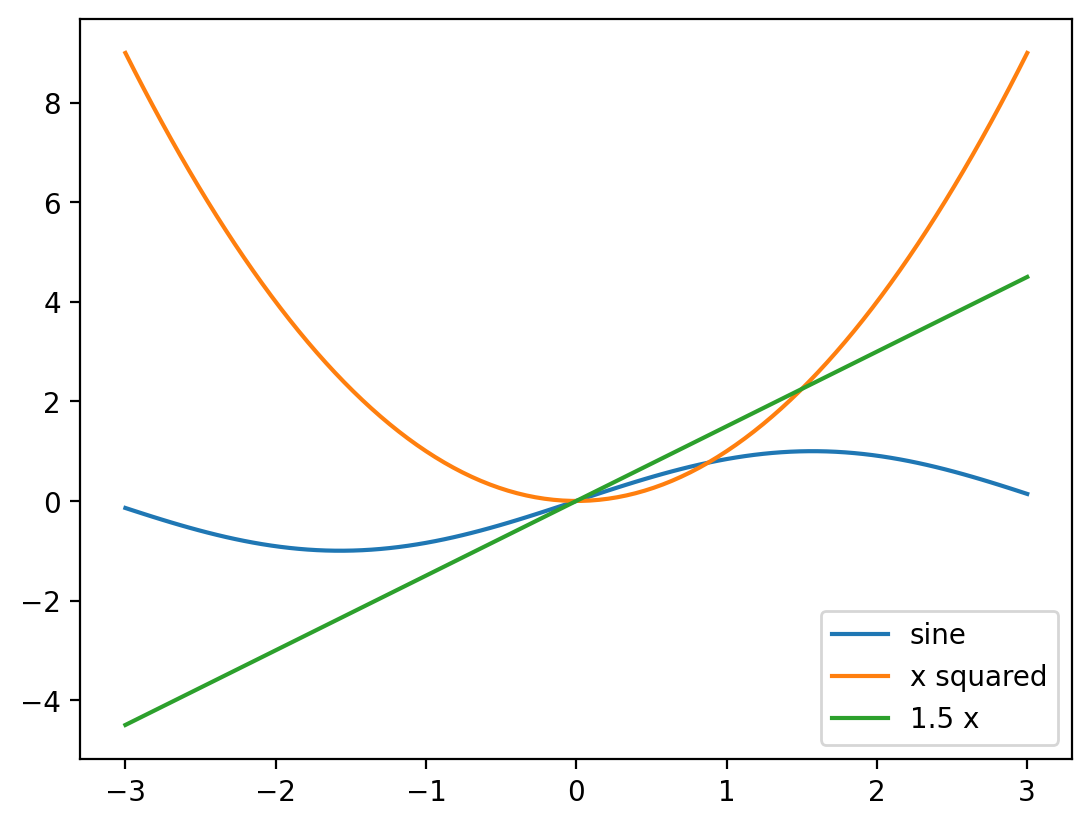

In [221]:
fig, ax = plt.subplots()
ax.plot(xs, f1, label="sine")
ax.plot(xs, f2, label="x squared")
ax.plot(xs, f3, label="1.5 x")
ax.legend()

This mechanism allows us to control several figures independently, as the following example shows:

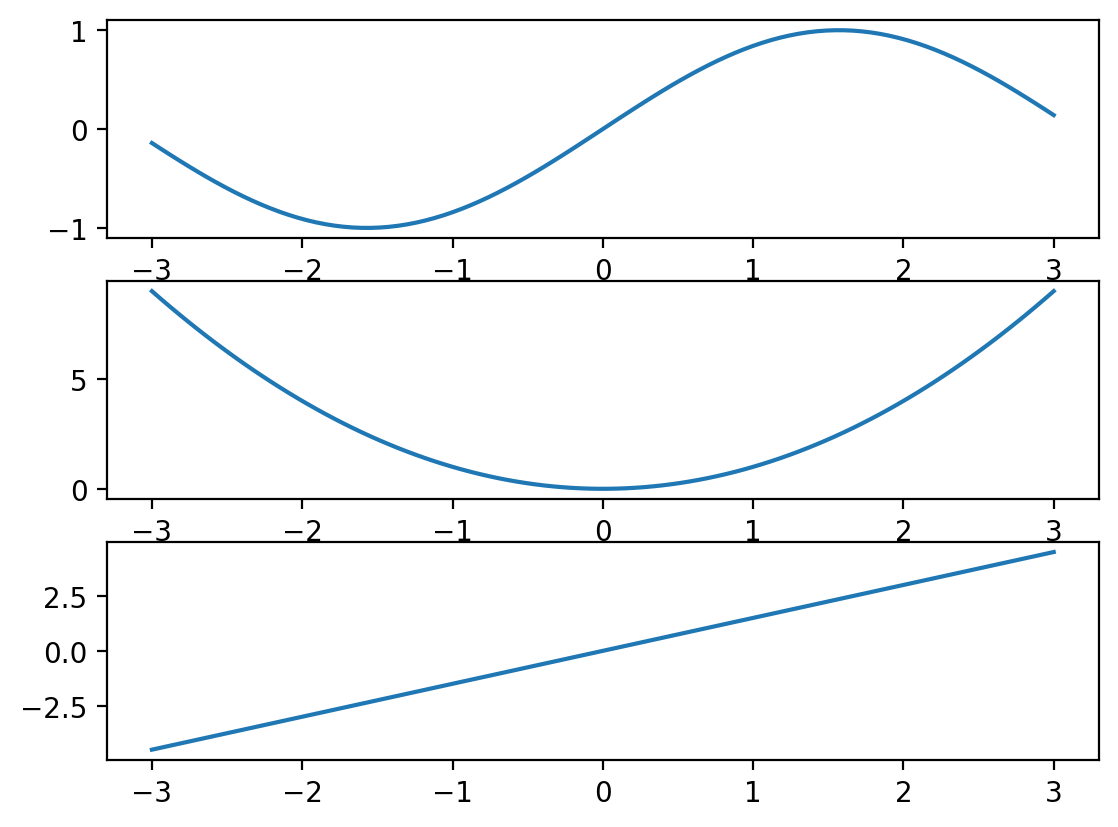

In [226]:
fig, axs = plt.subplots(3, 1)
axs[0].plot(xs, f1, label="sine")
axs[1].plot(xs, f2, label="x squared")
axs[2].plot(xs, f3, label="1.5 x")

### An example using real data

In our next example we use real data that we downloaded from the [data portal of Basel Stadt](https://data.bs.ch/explore/). 

In [229]:
df = pd.read_csv("..\data\population-basel.csv", sep=";")
df.head()

,Datum,Wohnviertel,Wohnviertel-ID,Bezirk,Bezirks-ID,Gemeinde,Anzahl,Jahr,Monat,Geo Shape,Geo Point
0,2024-01-31,Bachletten,8,Paulus,81,Basel,2239,2024,1,"{""coordinates"": [[[7.576319722638299, 47.54391...","47.54853034817656, 7.578295371202977"
1,2024-01-31,Clara,13,Claramatte,132,Basel,3335,2024,1,"{""coordinates"": [[[7.594609010206709, 47.56196...","47.5640467573854, 7.595633904896014"
2,2024-01-31,Iselin,10,Wasgenring-West,103,Basel,5873,2024,1,"{""coordinates"": [[[7.56475362902358, 47.557117...","47.56407980324947, 7.560870598596634"
3,2024-01-31,Matthäus,17,Bläsi,174,Basel,7127,2024,1,"{""coordinates"": [[[7.590345062592715, 47.56929...","47.56898425489169, 7.5940845142131925"
4,2024-01-31,Matthäus,17,Flora,171,Basel,1511,2024,1,"{""coordinates"": [[[7.591300940605439, 47.56527...","47.56473121311653, 7.589365487477029"


The dataframe contains information about the population per neighboorhood. As the data is too fine-grained for our purposes, we aggregate the population for each district:


In [231]:
population_per_district = df \
    .groupby("Wohnviertel")[["Anzahl"]] \
    .sum() \
    .sort_values(by="Anzahl") \
    .reset_index()

The simplest way of plotting the data is to use the built in plot function in Pandas. 

<Axes: ylabel='Wohnviertel'>

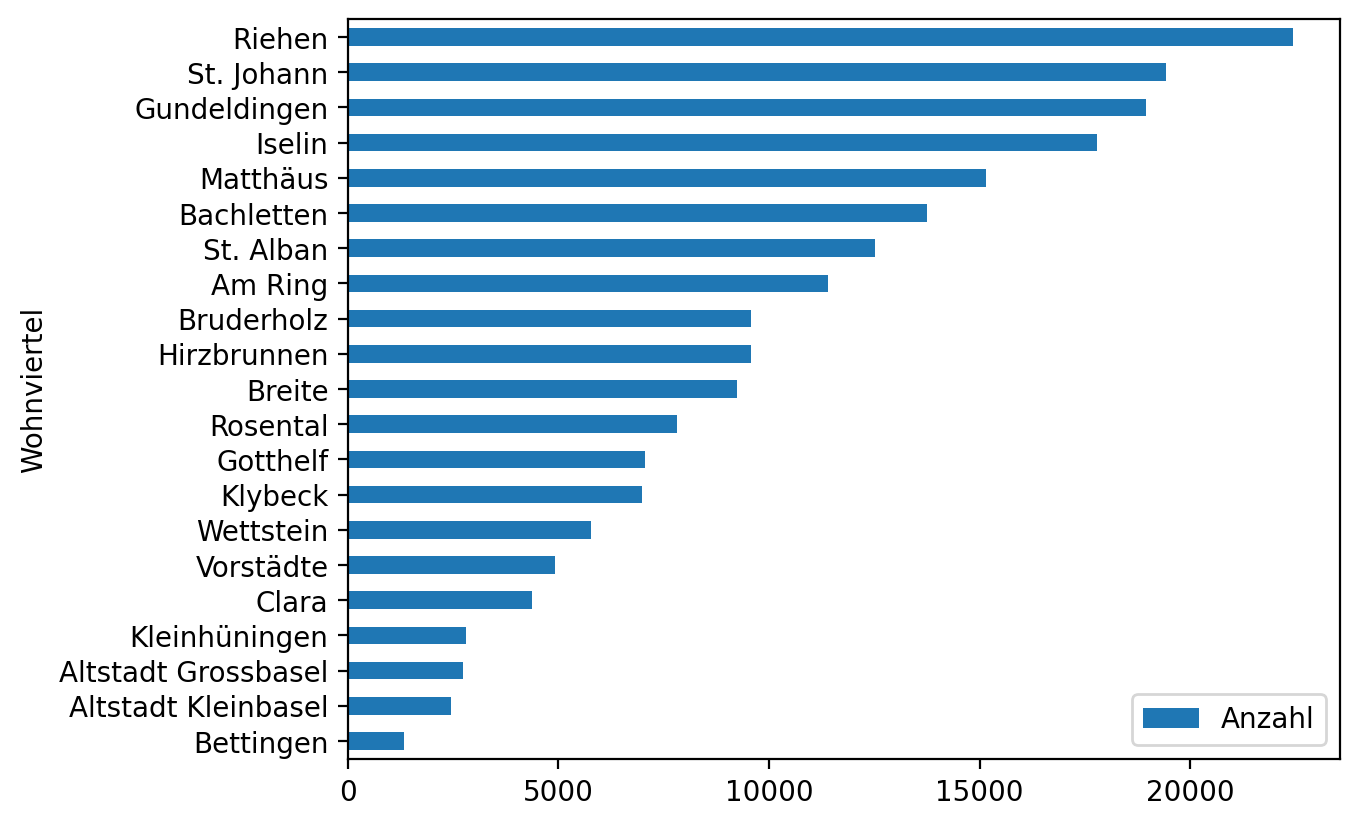

In [232]:
population_per_district.plot.barh(x="Wohnviertel", y = "Anzahl")

We can create the exact same plot using matplotlib:

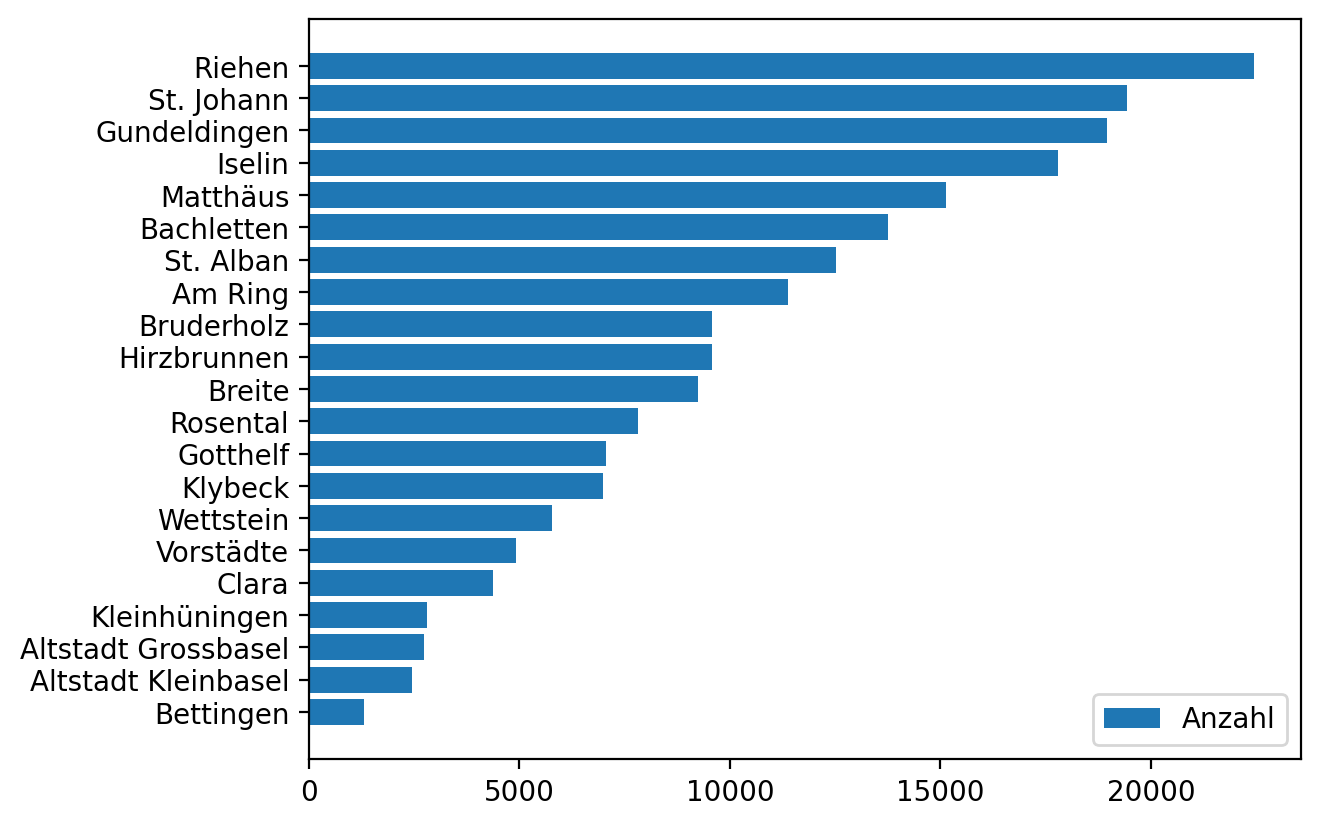

In [236]:
plt.barh(population_per_district["Wohnviertel"], population_per_district["Anzahl"], label="Anzahl")
plt.legend()

From the style it is easy to see that pandas simply uses Matplotlib as a plotting backend. The plot does not look attractive. 

### Making the graph more stylish


Next we show how we can visualize the same data, but in a much more attractive style. This is possible in Matplotlib, but only with the big additional effort of specifying all the individual aspects of the plot separately. Fortunately, we learn in this way also how a matplotlib plot is built up. 

The best way to understand the plot is to comment out parts of it and to see how the visualization changes. 

In [258]:
# set global properties of plot  
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.facecolor'] = 'white'

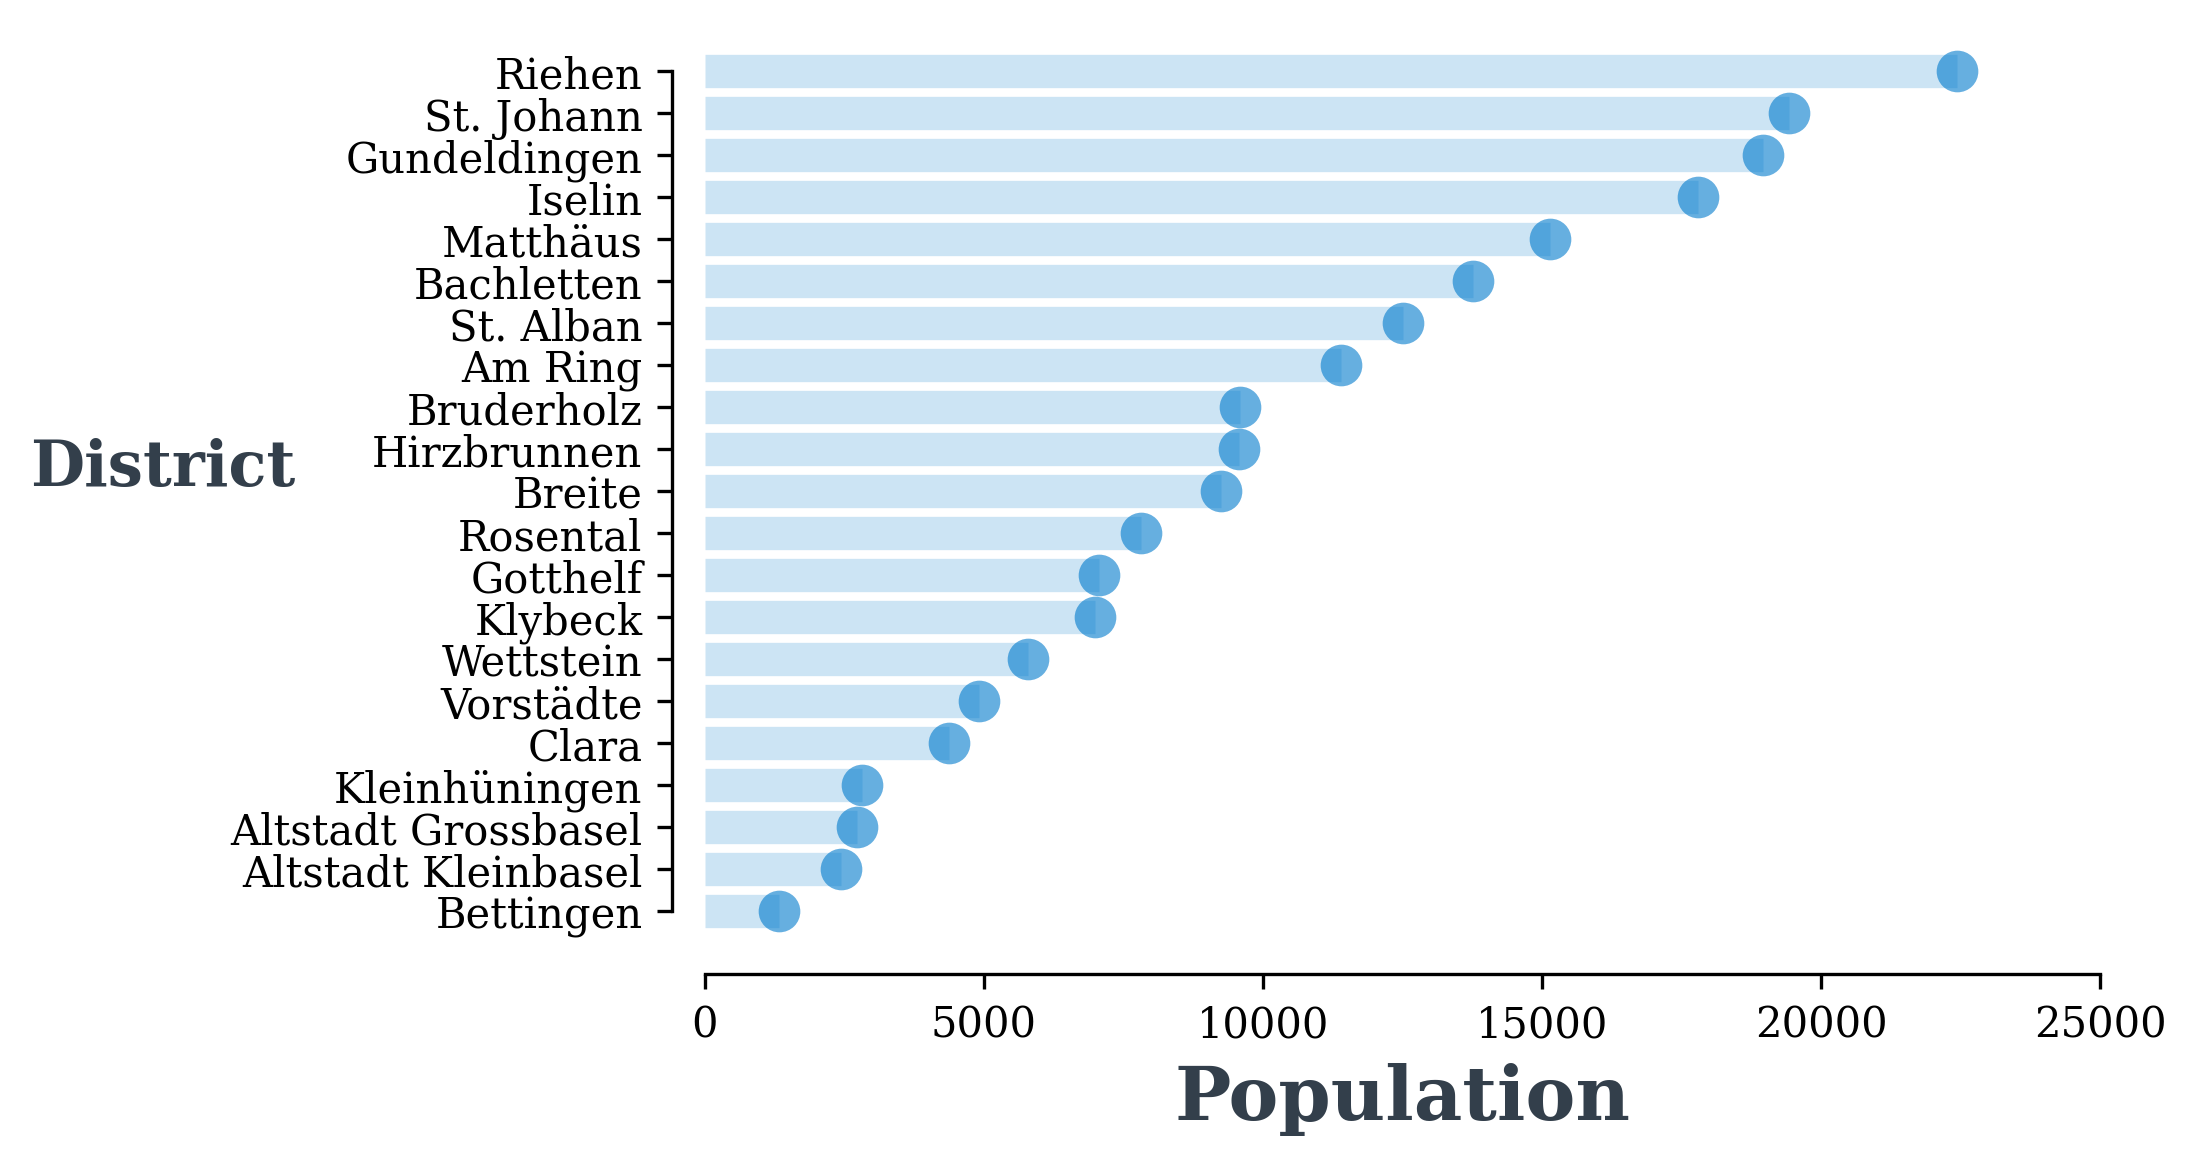

In [264]:
# Create a new figure
fig, ax = plt.subplots(figsize=(6, 4))

# The positions where we plot the horizontal bars
y_positions = [i * 1 for i in range(len(population_per_district["Wohnviertel"]))]

# plot horizontal bars
ax.hlines(y=y_positions,  # where to plot the bars 
           xmin=0, 
           xmax=population_per_district['Anzahl'], # how long the bars are 
           color='#007ACC', 
           alpha=0.2,  # opacity
           linewidth=8 # width of the bars
          )

# plot small circles at the end 
ax.plot(population_per_district['Anzahl'],# / 1e6, 
         y_positions, 
         'o', 
         markersize=10,
         markeredgewidth=0,
         color='#007ACC', 
         alpha=0.6
        )

# set the label of the x axis
ax.set_xlabel('Population', 
              fontsize=18, 
              fontweight='black', 
              color = '#333F4B'
             )


# # add an horizonal label for the y axis 
fig.text(-0.25, 0.50, 
         'District', 
         fontsize=15, 
         fontweight='black', 
         color='#333F4B')

# customize how the ticks look
ax.tick_params(axis='both', 
               which='major', 
               labelsize=10
              )
# What is the min and max value shown on the x axis
ax.set_xlim(0, 25000)

# set the tick position and the actual labels 
ax.set_yticks(y_positions)
ax.set_yticklabels(population_per_district["Wohnviertel"])



# change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_bounds((0, max(y_positions)))
ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))

# save it to a file
#plt.savefig('basel.tiff', dpi=300, bbox_inches='tight')